In [1]:
import os, pandas as pd
from fredapi import Fred

fred = Fred(api_key=os.getenv("FRED_API_KEY"))

df = (
    fred.get_series("UNRATE", observation_start="2010-01-01")
        .rename("Unrate")             # label the value column
        .reset_index()                # push the index out
        .rename(columns={"index": "Date"})   # give the date column a real name
)

df.tail()

,Date,Unrate
181,2025-02-01,4.1
182,2025-03-01,4.2
183,2025-04-01,4.2
184,2025-05-01,4.2
185,2025-06-01,4.1


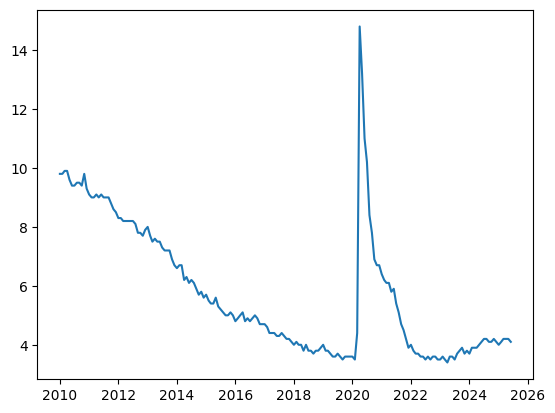

In [2]:
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['Unrate'])

In [3]:
import numpy as np

In [4]:
df['Unrate'].std()

np.float64(2.219982497685954)

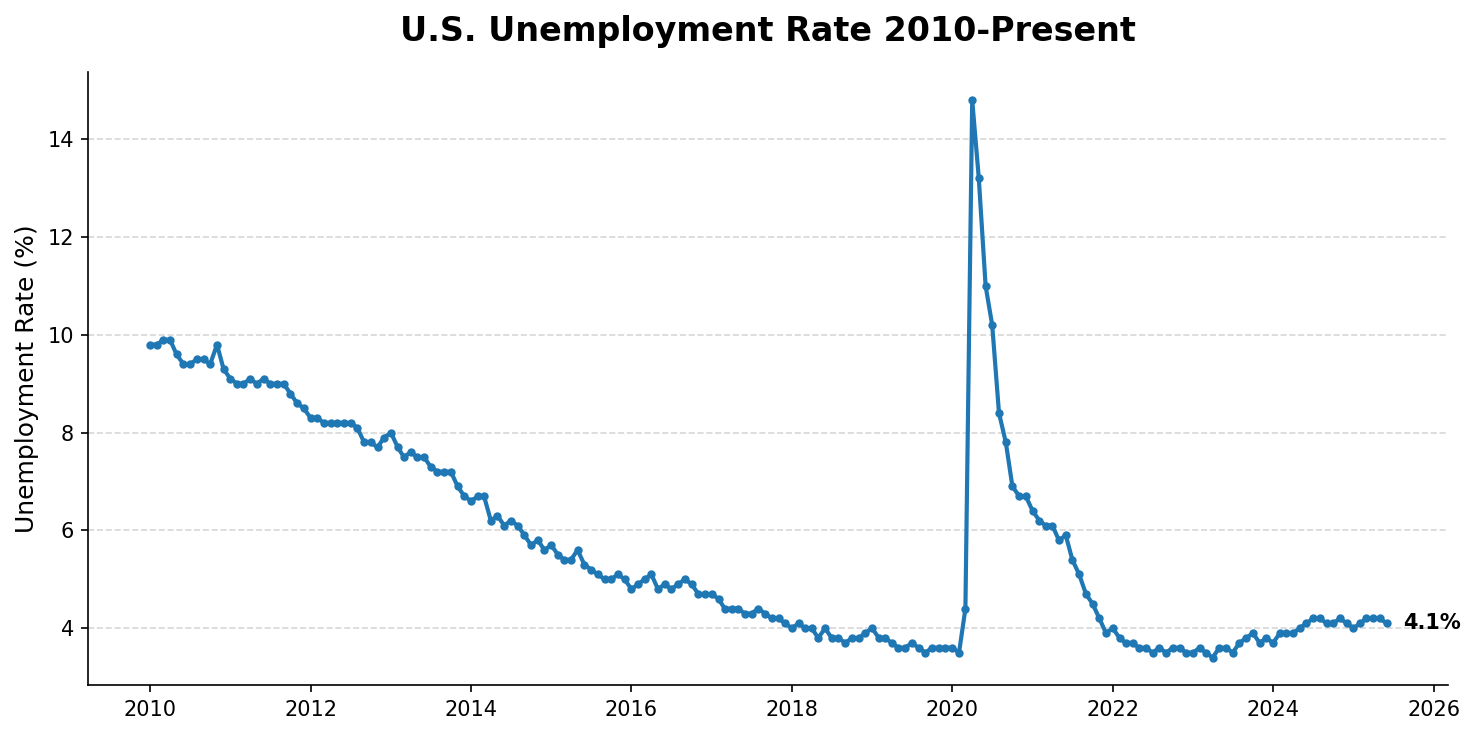

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----- figure & axes ------------------------------------------------------- #
fig, ax = plt.subplots(figsize=(10, 5), dpi=150)

ax.plot(
    df["Date"],
    df["Unrate"],
    linewidth=2,
    marker="o",
    markersize=3,
)

# ----- branding & context -------------------------------------------------- #
ax.set_title(
    "U.S. Unemployment Rate 2010-Present",
    fontsize=16,
    weight="bold",
    pad=15,
)

ax.set_ylabel("Unemployment Rate (%)", fontsize=12)
ax.set_xlabel("")  # keep the x-axis clean; dates speak for themselves

# highlight the most recent observation
last = df.iloc[-1]
ax.annotate(
    f"{last['Unrate']:.1f}%",
    xy=(last["Date"], last["Unrate"]),
    xytext=(8, 0),
    textcoords="offset points",
    va="center",
    fontsize=10,
    weight="bold",
)

# ----- visual polish ------------------------------------------------------- #
ax.xaxis.set_major_locator(mdates.YearLocator(2))            # tick every 2 years
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax.grid(axis="y", linestyle="--", alpha=0.5)

ax.spines["top"].set_visible(False)   # hide two spines = lighter frame
ax.spines["right"].set_visible(False)

fig.tight_layout()
plt.show()
